# This Notebook will be used to build the Capstone Project Model

### Importing all the libraries required for the analysis

In [1]:
import numpy as np
import pandas as pd

!conda install -c conda-forge geocoder --yes
import geocoder

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium --yes 
import folium # map rendering library

import urllib.request
from bs4 import BeautifulSoup

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geocoder:        1.38.1-py_1       conda-forge
    python_abi:    

things that i need in close proximity:
    'Park',
       'Theater',  'Gym / Fitness Center', 'Hotel',  'Breakfast Spot',
       'Grocery Store',  'Supermarket', 
       'Shopping Mall', 'Gym',
       'Indian Restaurant',
        'Bank', 'Gas Station', 
       'Street Art', 
       'Rental Car Location', 'Track', 'Video Game Store',
       'Gaming Cafe', 

# Scraping Wikipedia using BeautifulSoup to pull necessary table

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = urllib.request.urlopen(url)

In [3]:
Toronto_soup = BeautifulSoup(page, "lxml")

In [ ]:
print(Toronto_soup.prettify())

In [5]:
Toronto_soup.title.string

'List of postal codes of Canada: M - Wikipedia'

In [102]:
all_tables=Toronto_soup.find_all("table")


In [103]:
right_table=Toronto_soup.find('table', class_='wikitable sortable')


# Converting the table into a Dataframe

In [8]:
A=[]
B=[]
C=[]


for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))


In [9]:
import pandas as pd
df=pd.DataFrame(A,columns=['Postal Code'])
df['Borough']=B
df['Neighborhood']=C
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


### Removing rows without a Borough name
### Removing the newline operators from each cell of the table/dataframe

In [10]:
df1 = df[df['Borough'] != 'Not assigned\n']

df1.reset_index(drop=True,inplace=True)

df1 = df1.replace('\n','', regex=True)

In [11]:
df1.shape

(103, 3)

In [12]:
dfPost = df1[['Postal Code']]
dfPost['Postal Code'][0]

'M3A'

In [13]:
dfpll = pd.DataFrame(columns=['Postal Code', 'Latitude', 'Longitude'])
dfpll

,Postal Code,Latitude,Longitude


In [14]:
dfPost.shape

(103, 1)

### Pulling the geocodes for the final list of Postal Codes

In [15]:
import geocoder
for i in range (dfPost['Postal Code'].count()):
    g = geocoder.arcgis('{}, Toronto, Ontario'.format(dfPost['Postal Code'][i]))
    lat_lng_coords = g.latlng
    #print(lat_lng_coords)
    dfpll = dfpll.append({'Postal Code': dfPost['Postal Code'][i], 'Latitude': lat_lng_coords[0], 'Longitude': lat_lng_coords[1]}, ignore_index=True)

In [16]:
dfpll.shape

(103, 3)

In [17]:
dfpll.head()

,Postal Code,Latitude,Longitude
0,M3A,43.752935,-79.335641
1,M4A,43.728102,-79.311890
2,M5A,43.650964,-79.353041
3,M6A,43.723265,-79.451211
4,M7A,43.661790,-79.389390


In [18]:
df1.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [19]:
df_Final = df1.merge(dfpll,on='Postal Code')

## This is the final cleaned up location datatable

In [20]:
df_Final.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.752935,-79.335641
1,M4A,North York,Victoria Village,43.728102,-79.311890
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650964,-79.353041
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.723265,-79.451211
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.661790,-79.389390


### Selecting only Toronto Boroughs

In [21]:
dfT_1 = df_Final[df_Final["Borough"].str.contains("Toronto")]
dfT_1.reset_index(drop=True,inplace=True)
dfT_1

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650964,-79.353041
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.661790,-79.389390
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657491,-79.377529
3,M5C,Downtown Toronto,St. James Town,43.651734,-79.375554
4,M4E,East Toronto,The Beaches,43.678148,-79.295349
5,M5E,Downtown Toronto,Berczy Park,43.645196,-79.373855
6,M5G,Downtown Toronto,Central Bay Street,43.656072,-79.385653
7,M6G,Downtown Toronto,Christie,43.668602,-79.420387
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650542,-79.384116
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.664910,-79.438664


In [22]:
dfT = dfT_1[['Postal Code','Latitude','Longitude']]
dfT.reset_index(drop=True,inplace=True)
dfT.shape

(39, 3)

In [23]:
t = geocoder.arcgis('Toronto, Ontario')
T_lat_long = t.latlng
Toronto_Lat = T_lat_long[0]
Toronto_Long = T_lat_long[1]
print('The geograpical coordinate of Toronto are {}, {}.'.format(Toronto_Lat, Toronto_Long))

The geograpical coordinate of Toronto are 43.648690000000045, -79.38543999999996.


# This is a map of the selected Boroughs to analyse

In [24]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[Toronto_Lat, Toronto_Long], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood, postal_code in zip(dfT_1['Latitude'], dfT_1['Longitude'], dfT_1['Borough'], dfT_1['Neighborhood'], dfT_1['Postal Code']):
    label = '{}, {}, {}'.format(neighborhood, borough, postal_code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

# Using the Foursquare API to analyse one postal Code(M5A)

In [25]:
dfT.loc[0, 'Postal Code']

'M5A'

In [26]:
ps_latitude = dfT.loc[0, 'Latitude'] # neighborhood latitude value
ps_longitude = dfT.loc[0, 'Longitude'] # neighborhood longitude value

ps_name = dfT.loc[0, 'Postal Code'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(ps_name, 
                                                               ps_latitude, 
                                                               ps_longitude))

Latitude and longitude values of M5A are 43.65096410900003, -79.35304116399999.


In [27]:
CLIENT_ID = 'IVTAT03J0YSCXEE0LTTSZL1LRRFPIYID1QMQNYHXQEFE0BEA' # your Foursquare ID
CLIENT_SECRET = 'RFBHOKAJ1ZN5TXAMVXPXM4IOS1521WBTXMM1ZNGVFCW5123V' # your Foursquare Secret
VERSION = '20200505' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IVTAT03J0YSCXEE0LTTSZL1LRRFPIYID1QMQNYHXQEFE0BEA
CLIENT_SECRET:RFBHOKAJ1ZN5TXAMVXPXM4IOS1521WBTXMM1ZNGVFCW5123V


In [28]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ps_latitude, 
    ps_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=IVTAT03J0YSCXEE0LTTSZL1LRRFPIYID1QMQNYHXQEFE0BEA&client_secret=RFBHOKAJ1ZN5TXAMVXPXM4IOS1521WBTXMM1ZNGVFCW5123V&v=20200505&ll=43.65096410900003,-79.35304116399999&radius=500&limit=100'

In [29]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # library to handle JSON files

results = requests.get(url).json()


In [30]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [31]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Souk Tabule,Mediterranean Restaurant,43.653756,-79.354390
1,Young Centre for the Performing Arts,Performing Arts Venue,43.650825,-79.357593
2,SOMA chocolatemaker,Chocolate Shop,43.650622,-79.358127
3,BATLgrounds,Athletics & Sports,43.647088,-79.351306
4,Cluny Bistro & Boulangerie,French Restaurant,43.650565,-79.357843


In [32]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursquare.


# Pulling venues for all Postal Codes

### Assumption : I have considered a radius of 1.5 km because that is a comfortable range for a walk or a short drive to any of the venues that i will require to visit  

In [83]:
# This is a funtion to make the API requests and append into a table the venues info
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal Code', 
                  'Postal Cdoe Latitude', 
                  'Postal Code Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [84]:
# type your answer here

toronto_venues = getNearbyVenues(names=dfT['Postal Code'],
                                   latitudes=dfT['Latitude'],
                                   longitudes=dfT['Longitude']
                                  )



M5A
M7A
M5B
M5C
M4E
M5E
M5G
M6G
M5H
M6H
M5J
M6J
M4K
M5K
M6K
M4L
M5L
M4M
M4N
M5N
M4P
M5P
M6P
M4R
M5R
M6R
M4S
M5S
M6S
M4T
M5T
M4V
M5V
M4W
M5W
M4X
M5X
M4Y
M7Y


In [85]:
print(toronto_venues.shape)
toronto_venues.head()

(3668, 7)


,Postal Code,Postal Cdoe Latitude,Postal Code Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M5A,43.650964,-79.353041,Souk Tabule,43.653756,-79.354390,Mediterranean Restaurant
1,M5A,43.650964,-79.353041,BATLgrounds,43.647088,-79.351306,Athletics & Sports
2,M5A,43.650964,-79.353041,SOMA chocolatemaker,43.650622,-79.358127,Chocolate Shop
3,M5A,43.650964,-79.353041,The Distillery Historic District,43.650244,-79.359323,Historic Site
4,M5A,43.650964,-79.353041,Young Centre for the Performing Arts,43.650825,-79.357593,Performing Arts Venue


### Counting number of venues for each postal code to make sure there is enough data

In [86]:
toronto_venues.groupby('Postal Code').count()

,Postal Cdoe Latitude,Postal Code Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postal Code,,,,,,
M4E,100,100,100,100,100,100
M4K,84,84,84,84,84,84
M4L,100,100,100,100,100,100
M4M,85,85,85,85,85,85
M4N,63,63,63,63,63,63
M4P,99,99,99,99,99,99
M4R,100,100,100,100,100,100
M4S,100,100,100,100,100,100
M4T,90,90,90,90,90,90


In [87]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 256 uniques categories.


In [88]:
toronto_venues['Venue Category'].unique()

array(['Mediterranean Restaurant', 'Athletics & Sports', 'Chocolate Shop',
       'Historic Site', 'Performing Arts Venue', 'Park',
       'French Restaurant', 'Tech Startup', 'Farmers Market',
       'Restaurant', 'Café', 'Circus', 'Coffee Shop', 'Dessert Shop',
       'Distribution Center', 'Bakery', 'Theater', 'Pub', 'Diner',
       'Shoe Store', 'Gym / Fitness Center', 'Hotel', 'BBQ Joint',
       'Liquor Store', 'Ice Cream Shop', 'Hotel Bar', 'Breakfast Spot',
       'Middle Eastern Restaurant', 'Brewery', 'Taco Place', 'Bar',
       'Italian Restaurant', 'Spa', 'Mexican Restaurant', 'Wine Bar',
       'Nightclub', 'Gastropub', 'Curling Ice', 'Dive Bar', 'Pool',
       'Electronics Store', 'Cosmetics Shop', 'Rock Club',
       'Animal Shelter', 'Art Gallery', 'Coworking Space',
       'Thai Restaurant', 'Furniture / Home Store', 'Bistro',
       'Fish Market', 'Gym Pool', 'Grocery Store', 'German Restaurant',
       'Pizza Place', 'Bookstore', 'Yoga Studio', 'Pet Store',
       'E

# Using the above list i would like to short list the venues that i consider critical for my daily life needs

### Observation: there are a lot of different categories for resturants, that i dont really consider important for my daily life needs

In [89]:
KV = {'Venue Category':['Park','Theater', 'Gym / Fitness Center', 'Hotel', 'Breakfast Spot', 'Grocery Store',  'Supermarket', 'Shopping Mall', 'Gym','Indian Restaurant', 'Bank', 'Gas Station',  'Street Art', 'Rental Car Location', 'Track', 'Video Game Store', 'Gaming Cafe']}

Key_Venues = pd.DataFrame(KV, columns = ['Venue Category'])

Key_Venues


,Venue Category
0,Park
1,Theater
2,Gym / Fitness Center
3,Hotel
4,Breakfast Spot
5,Grocery Store
6,Supermarket
7,Shopping Mall
8,Gym
9,Indian Restaurant


# Preparing the data for Modelling

In [90]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Postal Code'] = toronto_venues['Postal Code'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Postal Code,American Restaurant,Amphitheater,Animal Shelter,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
toronto_grouped = toronto_onehot.groupby('Postal Code').mean().reset_index()
toronto_grouped

,Postal Code,American Restaurant,Amphitheater,Animal Shelter,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,M4E,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.010000,...,0.010000,0.01,0.000000,0.010000,0.000000,0.00,0.000000,0.000000,0.00,0.000000
1,M4K,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.011905,...,0.011905,0.00,0.011905,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.023810
2,M4L,0.010000,0.00,0.00,0.00,0.00,0.00,0.00,0.010000,0.010000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000
3,M4M,0.023529,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.011765,0.00,0.011765,0.000000,0.00,0.000000
4,M4N,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.031746,...,0.015873,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.015873
5,M4P,0.010101,0.00,0.00,0.00,0.00,0.00,0.00,0.010101,0.020202,...,0.000000,0.00,0.000000,0.010101,0.010101,0.00,0.010101,0.020202,0.00,0.020202
6,M4R,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.010000,0.000000,...,0.000000,0.00,0.000000,0.010000,0.010000,0.00,0.010000,0.000000,0.00,0.020000
7,M4S,0.010000,0.00,0.00,0.00,0.00,0.00,0.00,0.010000,0.020000,...,0.010000,0.00,0.000000,0.010000,0.010000,0.00,0.010000,0.020000,0.00,0.010000
8,M4T,0.011111,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,...,0.033333,0.00,0.000000,0.011111,0.000000,0.00,0.011111,0.000000,0.00,0.011111
9,M4V,0.030000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,...,0.010000,0.00,0.000000,0.030000,0.000000,0.00,0.010000,0.000000,0.00,0.020000


In [92]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [93]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postal Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ps_venues_sorted = pd.DataFrame(columns=columns)
ps_venues_sorted['Postal Code'] = toronto_grouped['Postal Code']

for ind in np.arange(toronto_grouped.shape[0]):
    ps_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

ps_venues_sorted.head(2)

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,Coffee Shop,Pub,Breakfast Spot,Japanese Restaurant,Bakery,Grocery Store,Ice Cream Shop,Sandwich Place,Beach,Gas Station
1,M4K,Greek Restaurant,Café,Park,Pizza Place,Coffee Shop,Pub,Bakery,Yoga Studio,Fish & Chips Shop,Breakfast Spot


# Clustering the data

In [94]:
toronto_grouped_clustering = toronto_grouped.drop('Postal Code', 1)

from scipy.spatial.distance import cdist

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering) 
    kmeanModel.fit(toronto_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(toronto_grouped_clustering, kmeanModel.cluster_centers_,'euclidean'),axis=1)) /toronto_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(toronto_grouped_clustering, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / toronto_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [95]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 0.10891254569051387
2 : 0.10184718088485718
3 : 0.09607699810852507
4 : 0.08849212419522767
5 : 0.08357091213988004
6 : 0.08212669266359904
7 : 0.07744840632811008
8 : 0.07526152352426509
9 : 0.07254917717324168


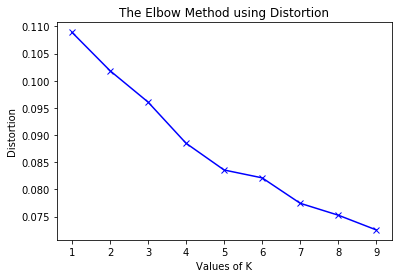

In [96]:
import matplotlib.pyplot as plt 
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [97]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val))

1 : 0.49816165328030404
2 : 0.426574308397088
3 : 0.38265243776927
4 : 0.32896183617703556
5 : 0.29435008335437285
6 : 0.28457205894152515
7 : 0.2593212746836591
8 : 0.24607883630047395
9 : 0.22907022803431


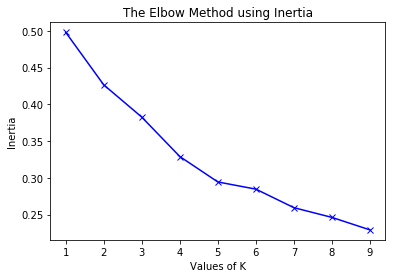

In [98]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

## Observation: USing the above 2 elbow point methods, K = 5 is the ideal number of clusters

In [99]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=3).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 


array([2, 4, 4, 4, 0, 4, 2, 4, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       0, 0, 4, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 4, 4, 2, 2], dtype=int32)

In [100]:
# add clustering labels
ps_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = dfT_1

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(ps_venues_sorted.set_index('Postal Code'), on='Postal Code')

toronto_merged # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650964,-79.353041,2,Coffee Shop,Café,Bakery,Park,Pub,Restaurant,Theater,Gastropub,Diner,Bar
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.661790,-79.389390,2,Coffee Shop,Park,Café,Japanese Restaurant,Theater,Arts & Crafts Store,Pizza Place,Shopping Mall,Men's Store,Dance Studio
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657491,-79.377529,2,Coffee Shop,Gastropub,Café,Japanese Restaurant,Theater,Restaurant,Italian Restaurant,Creperie,Cosmetics Shop,Thai Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651734,-79.375554,2,Coffee Shop,Café,Restaurant,Hotel,Italian Restaurant,Thai Restaurant,Plaza,Cosmetics Shop,Concert Hall,Park
4,M4E,East Toronto,The Beaches,43.678148,-79.295349,2,Coffee Shop,Pub,Breakfast Spot,Japanese Restaurant,Bakery,Grocery Store,Ice Cream Shop,Sandwich Place,Beach,Gas Station
5,M5E,Downtown Toronto,Berczy Park,43.645196,-79.373855,2,Coffee Shop,Café,Hotel,Italian Restaurant,Restaurant,Park,Plaza,American Restaurant,Japanese Restaurant,Farmers Market
6,M5G,Downtown Toronto,Central Bay Street,43.656072,-79.385653,2,Coffee Shop,Café,Gastropub,Park,Yoga Studio,Pizza Place,Italian Restaurant,Arts & Crafts Store,Bubble Tea Shop,Dance Studio
7,M6G,Downtown Toronto,Christie,43.668602,-79.420387,1,Café,Bar,Coffee Shop,Bakery,Park,Grocery Store,Dessert Shop,Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650542,-79.384116,2,Coffee Shop,Park,Café,Yoga Studio,Plaza,Japanese Restaurant,Sandwich Place,Italian Restaurant,Supermarket,Restaurant
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.664910,-79.438664,1,Café,Coffee Shop,Park,Italian Restaurant,Bakery,Bar,Pub,Restaurant,Cocktail Bar,Grocery Store


# Creating a map to observe the clusters

In [101]:
# create map
map_clusters = folium.Map(location=[Toronto_Lat, Toronto_Long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Postal Code'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Analysing the Clusters

In [52]:
def total_venue_categories(df):
    df_all_venues = df['1st Most Common Venue']
    df_all_venues = df_all_venues.append(df['2nd Most Common Venue'])
    df_all_venues = df_all_venues.append(df['3rd Most Common Venue'])
    df_all_venues = df_all_venues.append(df['4th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['5th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['6th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['7th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['8th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['9th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['10th Most Common Venue'])
    df_cnt = df_all_venues.value_counts().to_frame().reset_index()
    df_cnt.columns = ['Venue Category', 'Venue Count']
    df_cnt.sort_values(by = 'Venue Count', ascending = False)
#return the top 10 venue categories
    return df_cnt.head(10)

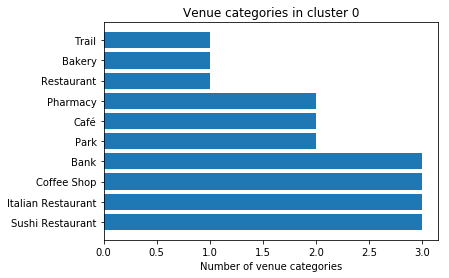

In [53]:
#count venue categories in all neighborhoods in the cluster
t0 = total_venue_categories(toronto_merged[toronto_merged['Cluster Labels'] == 0])

y_pos = np.arange(len(t0['Venue Category']))
plt.barh(y_pos, t0['Venue Count'], align='center')
plt.yticks(y_pos, t0['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 0')
 
plt.show()



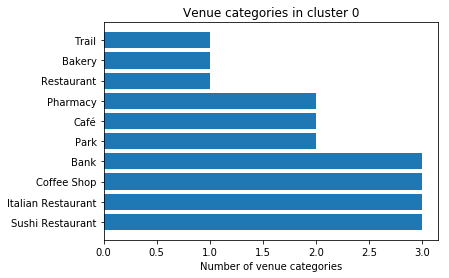

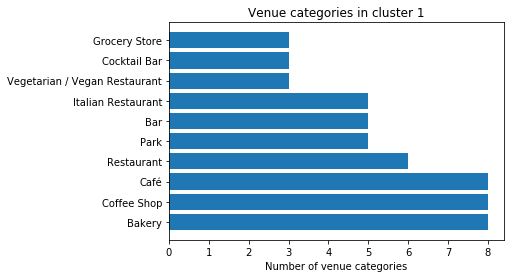

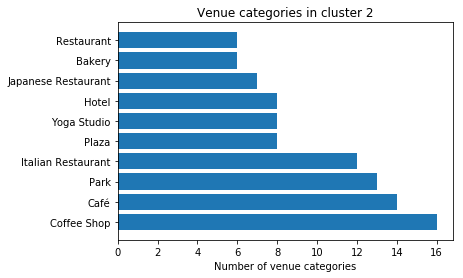

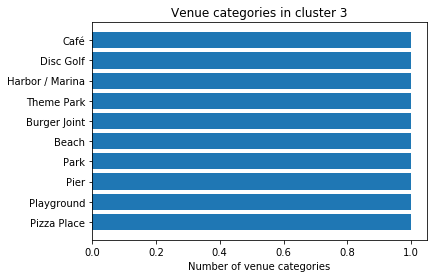

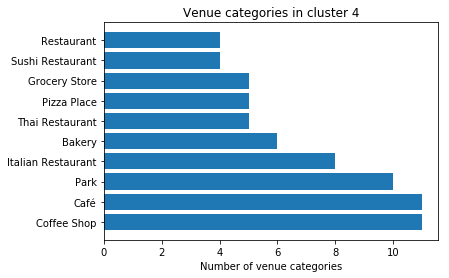

In [54]:
#count venue categories in all neighborhoods in the clusters

#Cluster 0
t0 = total_venue_categories(toronto_merged[toronto_merged['Cluster Labels'] == 0])

y_pos = np.arange(len(t0['Venue Category']))
plt.barh(y_pos, t0['Venue Count'], align='center')
plt.yticks(y_pos, t0['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 0')
 
plt.show()

#Cluster 1
t1 = total_venue_categories(toronto_merged[toronto_merged['Cluster Labels'] == 1])

y_pos = np.arange(len(t1['Venue Category']))
plt.barh(y_pos, t1['Venue Count'], align='center')
plt.yticks(y_pos, t1['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 1')
 
plt.show()

#Cluster 2
t2 = total_venue_categories(toronto_merged[toronto_merged['Cluster Labels'] == 2])

y_pos = np.arange(len(t2['Venue Category']))
plt.barh(y_pos, t2['Venue Count'], align='center')
plt.yticks(y_pos, t2['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 2')
 
plt.show()

#Cluster 3
t3 = total_venue_categories(toronto_merged[toronto_merged['Cluster Labels'] == 3])

y_pos = np.arange(len(t3['Venue Category']))
plt.barh(y_pos, t3['Venue Count'], align='center')
plt.yticks(y_pos, t3['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 3')
 
plt.show()

#Cluster 4
t4 = total_venue_categories(toronto_merged[toronto_merged['Cluster Labels'] == 4])

y_pos = np.arange(len(t4['Venue Category']))
plt.barh(y_pos, t4['Venue Count'], align='center')
plt.yticks(y_pos, t4['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 4')
 
plt.show()

## Observations: 

### 1. Cluster 3 is the Harbour/beach cluster
### 2. Cluster 1 has the highest concentration of Bars and hance can be classified as Nightlife Cluster
### 3. Clusters 0,2 and 4 have too many common features and hence further analysis is required.

# Lets look at the unique venues in the clusters

# Cluster 0 analysis - University cluster

### Presence of colleges and highschools and sports venues classifies this as a University/Education cluster

In [55]:
c0_Postal_codes = toronto_merged[toronto_merged['Cluster Labels'] == 0][['Postal Code']]
toronto_venues_c0_1 = pd.merge(toronto_venues,c0_Postal_codes, on='Postal Code', how='inner')

indexNames = toronto_venues_c0_1[toronto_venues_c0_1["Venue Category"].str.contains("Restaurant")].index
toronto_venues_c0_1.drop(indexNames , inplace=True)

toronto_venues_c0_1['Venue Category'].unique()

array(['Park', 'Gym / Fitness Center', 'Tea Room', 'Bakery',
       'General Entertainment', 'Bubble Tea Shop', 'Garden', 'BBQ Joint',
       'Burger Joint', 'Toy / Game Store', 'Ice Cream Shop',
       'Coffee Shop', 'Golf Course', 'Clothing Store', 'Pub', 'Café',
       'Dog Run', 'Diner', 'Frozen Yogurt Shop', 'Hobby Shop',
       'Lingerie Store', 'Bank', 'Cosmetics Shop', 'Pizza Place',
       'Pharmacy', 'Sandwich Place', 'Bookstore', 'Trail', 'College Quad',
       'College Gym', 'Gastropub', 'Food Court', 'Deli / Bodega',
       'Mobile Phone Shop', 'Yoga Studio', 'Convenience Store', 'Spa',
       'Intersection', 'Salon / Barbershop', 'Massage Studio',
       'Supermarket', 'Gym', 'Breakfast Spot', 'Gourmet Shop',
       'Bagel Shop', 'Arts & Crafts Store', 'Skating Rink',
       'Department Store', 'Gas Station', 'Liquor Store',
       'Food & Drink Shop', 'Tennis Court', 'Field', 'Bar',
       'Chiropractor', 'Hotel', 'Grocery Store', 'Soccer Field',
       'High School', 'F

#to find the top 20 occouring venues

toronto_venues_c0_1[['Venue Category','Postal Code']].groupby('Venue Category').count().sort_values(by=['Postal Code'], ascending=False).head(10)

In [56]:
toronto_venues_c0_1 = pd.merge(toronto_venues,c0_Postal_codes, on='Postal Code', how='inner')
toronto_venues_c0 = pd.merge(toronto_venues_c0_1,Key_Venues, on='Venue Category', how='inner')
toronto_venues_c0.groupby('Venue Category').count()

,Postal Code,Postal Cdoe Latitude,Postal Code Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Bank,11,11,11,11,11,11
Breakfast Spot,3,3,3,3,3,3
Gas Station,1,1,1,1,1,1
Grocery Store,2,2,2,2,2,2
Gym,5,5,5,5,5,5
Gym / Fitness Center,3,3,3,3,3,3
Hotel,1,1,1,1,1,1
Indian Restaurant,2,2,2,2,2,2
Park,7,7,7,7,7,7


toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + list(range(5, toronto_merged.shape[1]))]]

# Cluster 1 analysis - Nightlife cluster

### Presence of a large number of Bars, clubs and general nightime activity venues confirms this as the Nightlife Cluster 

In [57]:
c1_Postal_codes = toronto_merged[toronto_merged['Cluster Labels'] == 1][['Postal Code']]
toronto_venues_c1_1 = pd.merge(toronto_venues,c1_Postal_codes, on='Postal Code', how='inner')

indexNames = toronto_venues_c1_1[toronto_venues_c1_1["Venue Category"].str.contains("Restaurant")].index
toronto_venues_c1_1.drop(indexNames , inplace=True)

toronto_venues_c1_1['Venue Category'].unique()

array(['Grocery Store', 'Park', 'Café', 'Dessert Shop', 'Taco Place',
       'Coffee Shop', 'Design Studio', 'Spa', 'Cocktail Bar',
       'Health Food Store', 'Sandwich Place', 'Gift Shop', 'Pub',
       'Wine Bar', 'Indie Movie Theater', 'Comedy Club',
       'Arts & Crafts Store', 'Cupcake Shop', 'Music Store',
       'Deli / Bodega', 'Pastry Shop', 'Salon / Barbershop', 'Diner',
       'Playground', 'Brewery', 'Farmers Market', 'Castle', 'Beer Bar',
       'Bar', 'Event Space', 'Bakery', 'Historic Site', 'Museum',
       'Ice Cream Shop', 'Bridal Shop', 'Art Gallery', 'Nightclub',
       'Yoga Studio', 'Gay Bar', 'Hot Dog Joint', 'Market', 'Beer Store',
       'Gastropub', 'Other Great Outdoors', 'Snack Place', 'Soup Place',
       'Clothing Store', 'Skating Rink', 'Gym', 'Liquor Store',
       'Breakfast Spot', 'Train Station', 'Bank', 'Pizza Place',
       'Dog Run', 'Pharmacy', 'Bookstore', 'Miscellaneous Shop',
       'Paper / Office Supplies Store', 'Butcher', 'Whisky Bar',
  

In [58]:
toronto_venues_c1_1 = pd.merge(toronto_venues,c1_Postal_codes, on='Postal Code', how='inner')
toronto_venues_c1 = pd.merge(toronto_venues_c1_1,Key_Venues, on='Venue Category', how='inner')
toronto_venues_c1[['Venue Category','Postal Code']].groupby('Venue Category').count().sort_values(by=['Postal Code'], ascending=False)

,Postal Code
Venue Category,
Park,27
Grocery Store,12
Indian Restaurant,10
Breakfast Spot,5
Supermarket,5
Hotel,4
Theater,4
Gym,3
Bank,1


# Cluster 2 analysis - Business/Downtown cluster

In [59]:
c2_Postal_codes = toronto_merged[toronto_merged['Cluster Labels'] == 2][['Postal Code']]
toronto_venues_c2_1 = pd.merge(toronto_venues,c2_Postal_codes, on='Postal Code', how='inner')

indexNames = toronto_venues_c2_1[toronto_venues_c2_1["Venue Category"].str.contains("Restaurant")].index
toronto_venues_c2_1.drop(indexNames , inplace=True)

toronto_venues_c2_1['Venue Category'].unique()

array(['Athletics & Sports', 'Chocolate Shop', 'Historic Site',
       'Performing Arts Venue', 'Park', 'Tech Startup', 'Farmers Market',
       'Café', 'Circus', 'Coffee Shop', 'Dessert Shop',
       'Distribution Center', 'Bakery', 'Theater', 'Pub', 'Diner',
       'Shoe Store', 'Gym / Fitness Center', 'Hotel', 'BBQ Joint',
       'Liquor Store', 'Ice Cream Shop', 'Hotel Bar', 'Breakfast Spot',
       'Brewery', 'Taco Place', 'Bar', 'Spa', 'Wine Bar', 'Nightclub',
       'Gastropub', 'Curling Ice', 'Dive Bar', 'Pool',
       'Electronics Store', 'Cosmetics Shop', 'Rock Club',
       'Animal Shelter', 'Art Gallery', 'Coworking Space',
       'Furniture / Home Store', 'Bistro', 'Fish Market', 'Gym Pool',
       'Grocery Store', 'Pizza Place', 'Bookstore', 'Yoga Studio',
       'Pet Store', 'Event Space', 'Soccer Field', 'Sandwich Place',
       'Creperie', 'Bubble Tea Shop', 'Arts & Crafts Store', 'Beer Bar',
       'Dance Studio', 'Supermarket', 'Juice Bar', 'Concert Hall',
       'Mu

In [60]:
toronto_venues_c2_1 = pd.merge(toronto_venues,c2_Postal_codes, on='Postal Code', how='inner')
toronto_venues_c2 = pd.merge(toronto_venues_c2_1,Key_Venues, on='Venue Category', how='inner')
toronto_venues_c2[['Venue Category','Postal Code']].groupby('Venue Category').count().sort_values(by=['Postal Code'], ascending=False)

,Postal Code
Venue Category,
Park,61
Hotel,33
Gym,23
Theater,22
Grocery Store,17
Gym / Fitness Center,16
Supermarket,15
Shopping Mall,12
Breakfast Spot,11


# Cluster 3 analysis - Harbour Cluster

In [61]:
c3_Postal_codes = toronto_merged[toronto_merged['Cluster Labels'] == 3][['Postal Code']]
toronto_venues_c3_1 = pd.merge(toronto_venues,c3_Postal_codes, on='Postal Code', how='inner')

indexNames = toronto_venues_c3_1[toronto_venues_c3_1["Venue Category"].str.contains("Restaurant")].index
toronto_venues_c3_1.drop(indexNames , inplace=True)

toronto_venues_c3_1['Venue Category'].unique()

array(['Park', 'Theme Park', 'Scenic Lookout', 'Beach', 'Farm',
       'Beer Garden', 'Café', 'Disc Golf', 'Pizza Place', 'BBQ Joint',
       'Harbor / Marina', 'Boat or Ferry', 'Playground', 'Pier', 'Bar',
       'Burger Joint'], dtype=object)

# Cluster 4 analysis - Where I wanna live

# After analysing the 5 clusters i have determined that this is the best cluster for me to live in due to the following reasons:

### 1.Based on the count/spread of the number of key venues.
### 2.Cluster 2 also has a good count/spread of my requirements but it has too many hotels and hence will be crowded and noisy.
### 3.Based on the location of my new office i have selected "M6R" as the best neighbourhood to live in.
### 4. It is also close to at least one neighbourhood from 3 other clusters.

### 5. Full detailed analysis will be present in the final report

In [62]:
c4_Postal_codes = toronto_merged[toronto_merged['Cluster Labels'] == 4][['Postal Code']]
toronto_venues_c4_1 = pd.merge(toronto_venues,c4_Postal_codes, on='Postal Code', how='inner')

indexNames = toronto_venues_c4_1[toronto_venues_c4_1["Venue Category"].str.contains("Restaurant")].index
toronto_venues_c4_1.drop(indexNames , inplace=True)

toronto_venues_c4_1['Venue Category'].unique()

array(['Bakery', 'Cosmetics Shop', 'Pizza Place', 'Historic Site',
       'Farmers Market', 'Bookstore', 'Ice Cream Shop', 'Spa',
       'Concert Hall', 'Café', 'Yoga Studio', 'Grocery Store', 'Brewery',
       'Trail', 'Pub', 'Park', 'Fruit & Vegetable Store', 'Cocktail Bar',
       'BBQ Joint', 'Scenic Lookout', 'Juice Bar',
       'Furniture / Home Store', 'Dessert Shop', 'Other Great Outdoors',
       'Dance Studio', 'Donut Shop', 'Coffee Shop', 'Burger Joint',
       'Bubble Tea Shop', 'Dog Run', 'Diner', 'Beer Bar', 'Gastropub',
       'Flower Shop', 'Gourmet Shop', 'Pool', 'Breakfast Spot',
       'Fish & Chips Shop', 'Churrascaria', 'Bank', 'Pharmacy', 'Gym',
       'Beach', 'Comic Shop', 'Burrito Place', 'Liquor Store',
       'Snack Place', 'Bar', 'Soccer Field', 'Steakhouse', 'Skate Park',
       'Nail Salon', 'Flea Market', 'Tea Room', 'Indie Theater',
       'Arts & Crafts Store', 'Pet Store', 'Butcher', 'Chocolate Shop',
       'Sandwich Place', 'Fried Chicken Joint', 'Ba

In [63]:
toronto_venues_c4_1 = pd.merge(toronto_venues,c4_Postal_codes, on='Postal Code', how='inner')
toronto_venues_c4 = pd.merge(toronto_venues_c4_1,Key_Venues, on='Venue Category', how='inner')
toronto_venues_c4[['Venue Category','Postal Code']].groupby('Venue Category').count().sort_values(by=['Postal Code'], ascending=False)

,Postal Code
Venue Category,
Park,52
Grocery Store,23
Indian Restaurant,21
Gym,14
Breakfast Spot,12
Bank,11
Hotel,8
Supermarket,6
Gas Station,4
